In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mobile_dataset.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


###### Univariate Selection

In [4]:
X=df.iloc[:,:-1]
y=df['price_range']

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [8]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000001F57C5C6790>)

In [9]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [10]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])

dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [11]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


###### Feature Importance

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

In [15]:
print(model.feature_importances_)

[0.062189   0.01920497 0.03324081 0.01916265 0.030983   0.01702806
 0.03424182 0.03212113 0.03528875 0.03273162 0.03229089 0.04688549
 0.04882298 0.40231017 0.03391071 0.03346779 0.03360281 0.01443815
 0.01852527 0.01955393]


In [16]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features

battery_power    0.062189
blue             0.019205
clock_speed      0.033241
dual_sim         0.019163
fc               0.030983
four_g           0.017028
int_memory       0.034242
m_dep            0.032121
mobile_wt        0.035289
n_cores          0.032732
pc               0.032291
px_height        0.046885
px_width         0.048823
ram              0.402310
sc_h             0.033911
sc_w             0.033468
talk_time        0.033603
three_g          0.014438
touch_screen     0.018525
wifi             0.019554
dtype: float64

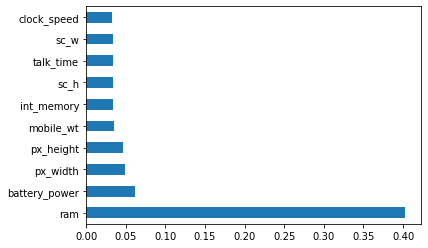

In [17]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

###### Correlation

In [18]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [39]:
def cor(dataset, threshold):
    col_corr = []
    cor_mat = dataset.corr()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i,j]) > threshold:
                colname = cor_mat.columns[i]
                colname.append(col_corr)
    return col_corr

In [40]:
cor(df.iloc[:,:-1], 0.7)

[]

###### Information Gain

In [42]:
from sklearn.feature_selection import mutual_info_classif

In [43]:
mutual_info=mutual_info_classif(X,y)

In [44]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.846292
battery_power    0.031076
sc_w             0.030149
px_width         0.026404
px_height        0.023030
pc               0.018343
sc_h             0.015225
fc               0.013881
four_g           0.008767
blue             0.004250
int_memory       0.004184
touch_screen     0.000116
m_dep            0.000000
mobile_wt        0.000000
n_cores          0.000000
dual_sim         0.000000
clock_speed      0.000000
talk_time        0.000000
three_g          0.000000
wifi             0.000000
dtype: float64

In [46]:
mutual_data.nlargest(10)

ram              0.846292
battery_power    0.031076
sc_w             0.030149
px_width         0.026404
px_height        0.023030
pc               0.018343
sc_h             0.015225
fc               0.013881
four_g           0.008767
blue             0.004250
dtype: float64

###### Chi Square 

In [50]:
import seaborn as sns
import numpy as np

In [51]:
df=sns.load_dataset('titanic')

In [52]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [58]:
for i in df.columns:
    print(f"{i}", df[i].unique())
    print("---------")

sex ['male' 'female']
---------
embarked ['S' 'C' 'Q' nan]
---------
alone [False  True]
---------
pclass [3 1 2]
---------
survived [0 1]
---------


In [59]:
df['sex']=np.where(df['sex']=="male",1,0)

### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

df['alone']=np.where(df['alone']==True,1,0)

In [61]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [62]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [63]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [64]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [71]:
p_values.sort_values(ascending=True)

sex         5.306038e-16
pclass      2.755149e-06
alone       9.696105e-04
embarked    5.999221e-03
dtype: float64

###### Observation

lesser p value higher the importance

Sex Column is the most important column when compared to the output feature Survived

In [73]:
git.init

NameError: name 'git' is not defined